# __*Artificial Intelligence - Fall 1402*__
#### __*Credit Card Fraud Detection*__
##### __*By Amirali Sajadi*__
***
<br>

# *1. Data Exploration*

#### *1. 1. Importing Necessary Modules and Methods*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#### *1. 2. Loading our Dataset*

In [2]:
df = pd.read_csv("Data/creditcard.csv")

#### *1. 3. Checking and Visualizing our Dataset*

In [3]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64
0    0.998273
1    0.001727
Name: Class, dtype: float64


(492, 31)

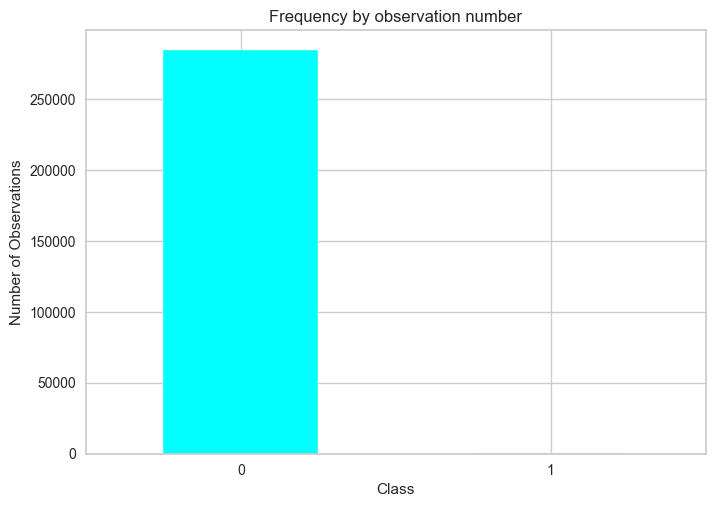

In [4]:
print(df.Amount.describe())

count = df["Class"].value_counts()
print(count/len(df))

plt.xlabel("Class")
plt.ylabel("Number of Observations")
color = ['aqua', 'violet']
count.plot(kind = 'bar', title = 'Frequency by observation number', rot = 0, color=color)
Fraud = df[df['Class'] == 1]
Fraud.shape

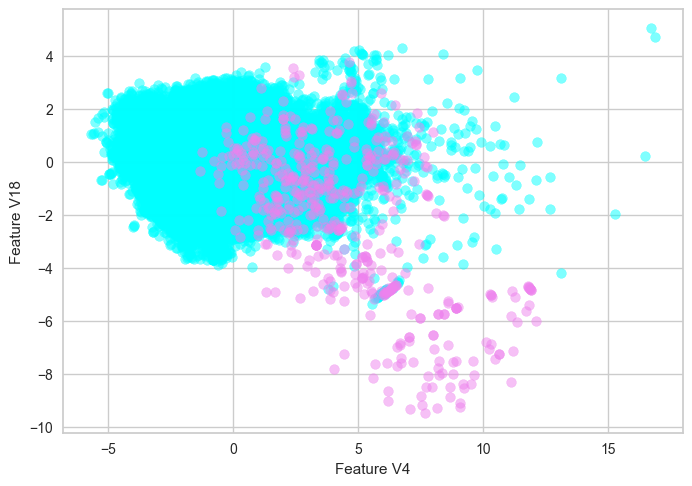

In [5]:
plt.scatter(df.loc[df['Class'] == 0]['V4'], df.loc[df['Class'] == 0]['V18'], label = "Class #0", alpha = 0.5, c = 'aqua')
plt.scatter(df.loc[df['Class'] == 1]['V4'], df.loc[df['Class'] == 1]['V18'], label = "Class #1", alpha = 0.5, c = 'violet')
plt.xlabel("Feature V4")
plt.ylabel("Feature V18")
plt.show()

C:\Users\Test\AppData\Local\Temp\ipykernel_18080\2026560628.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'].values/(60*60), ax = ax[0], color = 'aqua')
C:\Users\Test\AppData\Local\Temp\ipykernel_18080\2026560628.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'].valu

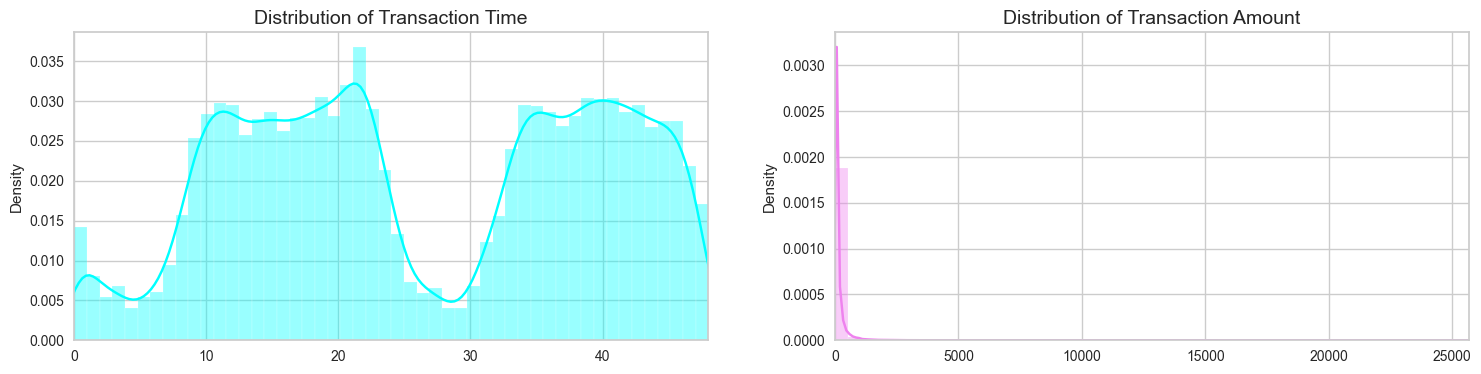

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df['Time'].values/(60*60), ax = ax[0], color = 'aqua')
ax[0].set_title('Distribution of Transaction Time', fontsize = 14)
ax[0].set_xlim([min(df['Time'].values/(60*60)), max(df['Time'].values/(60*60))])

sns.distplot(df['Amount'].values, ax = ax[1], color = 'violet')
ax[1].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[1].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

plt.show()

In [7]:
df_nonfraud = df[df.Class == 0]
print(df_nonfraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [8]:
df_fraud = df[df.Class == 1]
print(df_fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [9]:
F, p = stats.f_oneway(df['Amount'][df['Class'] == 0], df['Amount'][df['Class'] == 1])
print("F:", F)
print("p:",p)

F: 9.033344712018891
p: 0.0026512206498171095


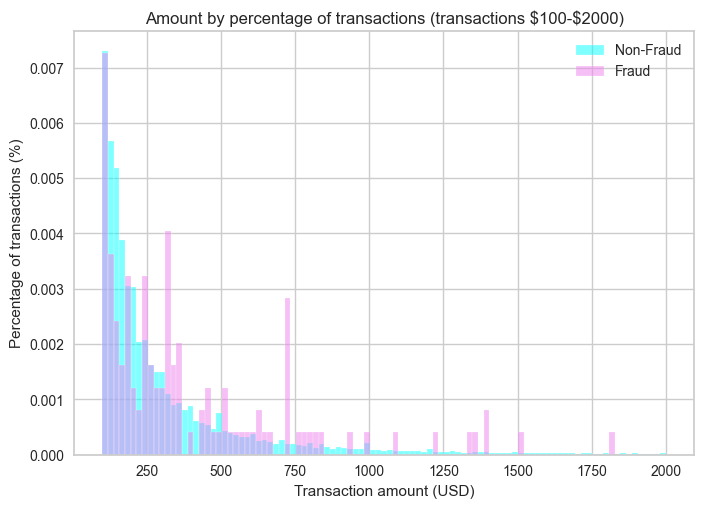

In [10]:
bins = np.linspace(100, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha = 0.5, density = True, label = 'Non-Fraud', color = 'aqua')
plt.hist(df_fraud.Amount, bins, alpha = 0.5, density = True, label = 'Fraud', color = 'violet')
plt.legend(loc = 'upper right')
plt.title("Amount by percentage of transactions (transactions \$100-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

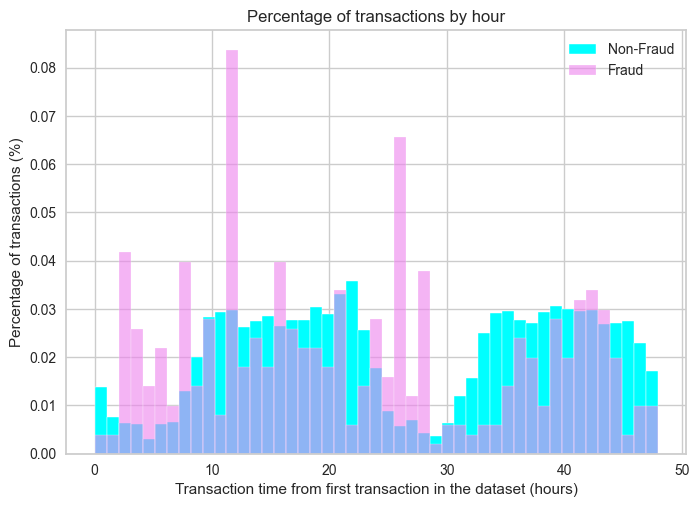

In [12]:
bins = np.linspace(0, 48, 48) #48 hours
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha = 1, density=True, label = 'Non-Fraud', color = 'aqua')
plt.hist((df_fraud.Time/(60*60)), bins, alpha = 0.6, density = True, label = 'Fraud', color = 'violet')
plt.legend(loc = 'upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

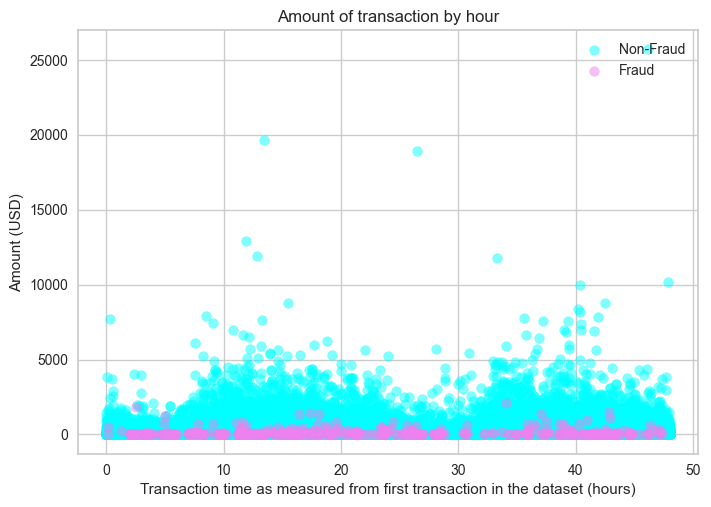

In [11]:
plt.scatter((df_nonfraud.Time/(60*60)), df_nonfraud.Amount, alpha = 0.5, label = 'Non-Fraud', color = 'aqua')
plt.scatter((df_fraud.Time/(60*60)), df_fraud.Amount, alpha = 0.5, label = 'Fraud', color = 'violet')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc = 'upper right')
plt.show()

C:\Users\Test\AppData\Local\Temp\ipykernel_18080\2096109010.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[feature], hist=False,label=label1)
C:\Users\Test\AppData\Local\Temp\ipykernel_18080\2096109010.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[feature],

<Figure size 800x550 with 0 Axes>

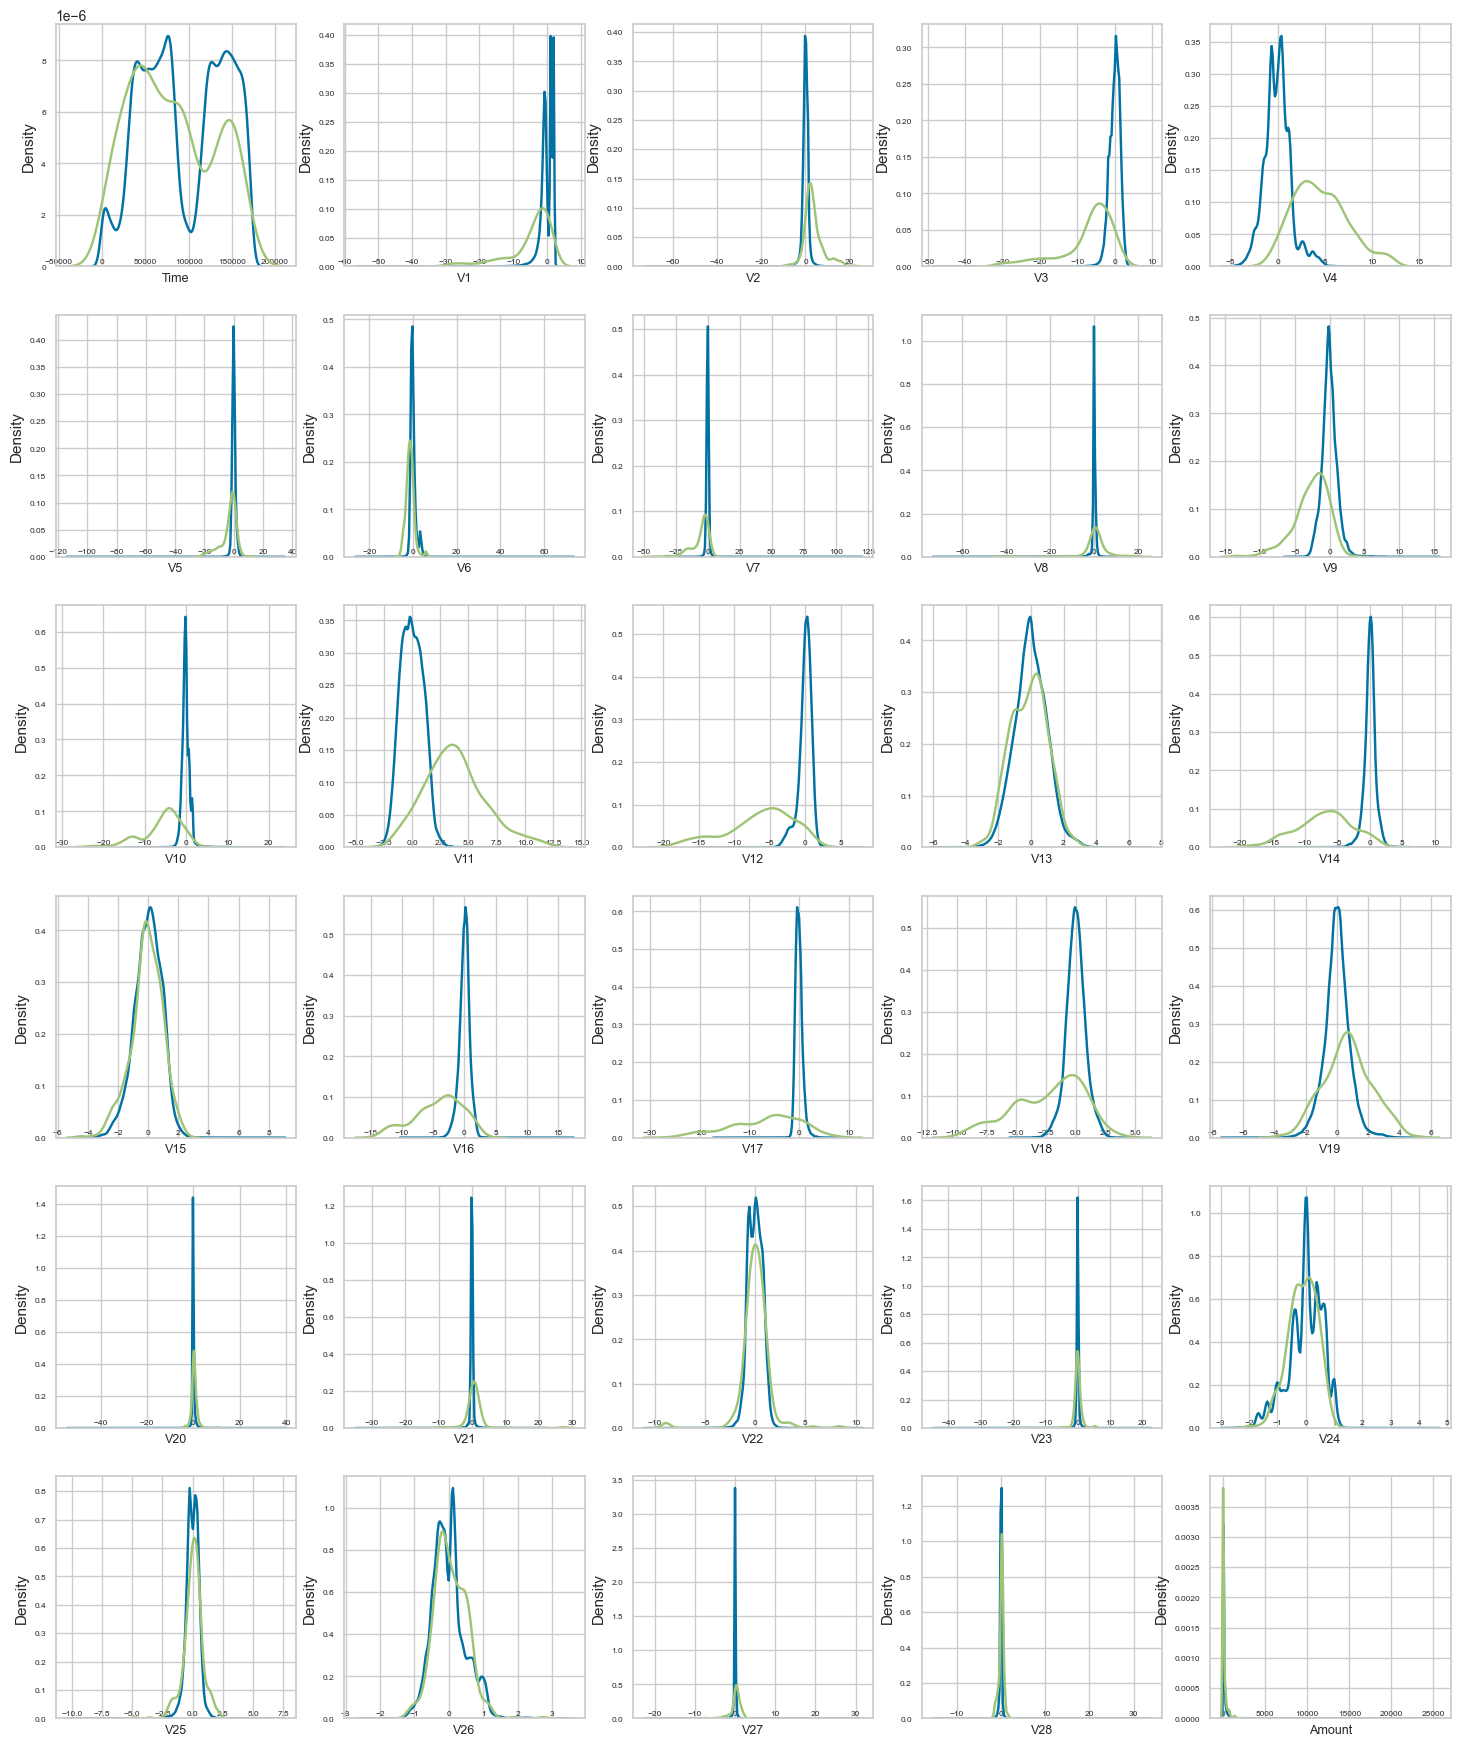

In [12]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(6,5,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(6,5,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]
features = df.columns.values[:-1]
plot_feature_distribution(t0, t1, '0', '1', features)

#### *1. 4. Analyzing the Pearson Correlation Matrix*

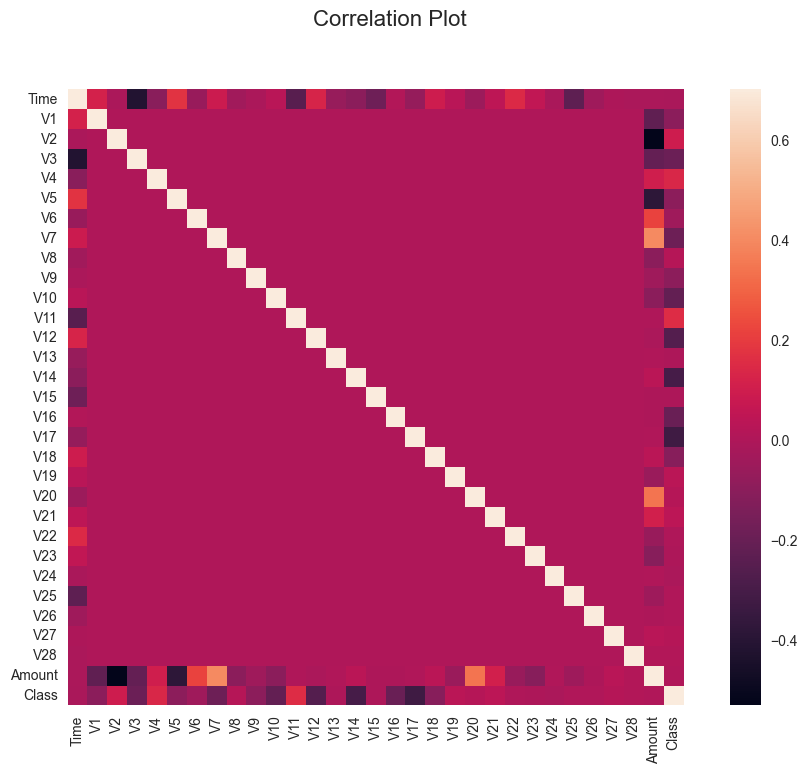

In [13]:
correlation_matrix = df.corr()
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Correlation Plot', fontsize = 16)
sns.heatmap(correlation_matrix,vmax = 0.7, square = True)
plt.show()

***
# *2. Preprocessing*

#### *2. 1. Splitting the Dataset Into the Train and Test Data*

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis = 1),df['Class'],test_size = .2,random_state = 21)

#### *2. 2. Normalization*

In [15]:
scaler = RobustScaler()
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['Time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1,1))
X_test['Time'] = scaler.transform(X_test['Time'].values.reshape(-1,1))
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
193580,0.535133,-0.799840,0.475496,0.945912,0.360518,0.849287,-0.022402,0.946082,-0.118777,-0.132950,...,-0.099909,-0.211023,-0.301974,0.365713,-0.575632,-0.598082,-1.066174,0.020482,-0.058998,0.704895
281512,1.005345,1.606285,-0.703248,-0.394818,1.486715,-0.788096,-0.504766,-0.227999,-0.115749,0.882403,...,0.120405,0.335594,0.713657,-0.021267,0.040442,-0.156591,-0.583700,0.022747,0.002051,2.323077
83404,-0.291376,1.281666,0.069899,-0.068433,-0.118893,-0.178783,-0.795593,0.142466,-0.089915,-0.153660,...,-0.110775,-0.428059,-1.371226,0.159838,-0.059506,0.088230,0.631566,-0.111973,-0.012174,-0.189091
131366,-0.059494,-0.247623,1.192310,0.733828,-0.278547,0.832577,-0.141225,0.796655,-0.069621,-0.526500,...,0.262873,-0.336441,-0.825071,-0.196949,-1.027739,0.078189,0.153566,0.252257,0.087571,-0.209930
169064,0.409590,2.109995,0.161872,-1.950143,0.263848,0.775884,-0.440883,0.182684,-0.192945,0.477652,...,-0.119696,-0.394579,-1.001854,0.267583,-0.111757,-0.179542,0.213154,-0.057794,-0.036438,-0.289650


#### *2. 3. Dealing with the Imbalanced Dataset by Resampling Data with RUS, ROS*

In [16]:
rus = RandomUnderSampler()
ros = RandomOverSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

#### *2. 4. Defining Helper Functions for Plotting Precision-Recall Curve and ROC*

In [17]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color = 'aqua', alpha = 0.5, where = 'post')
    plt.fill_between(recall, precision, step = 'post', alpha = 0.2, color = 'b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

In [18]:
def plot_roc(y_test, probs):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize = (16,4))
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.plot(fpr, tpr, marker = '.')
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy = (0.5, 0.5), xytext = (0.6, 0.3), arrowprops = dict(facecolor = 'violet', shrink = 0.05))
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

In [19]:
def DT(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    prob = model.predict_proba(X_test)
    return (prob[:,1],y_test)

***
# *3. Decision Tree Classifier*

#### *3. 1. Plotting the ROC curve for Decision Tree using Normal, Oversampled and Undersampled Datasets*

ROC plot for imbalanced data


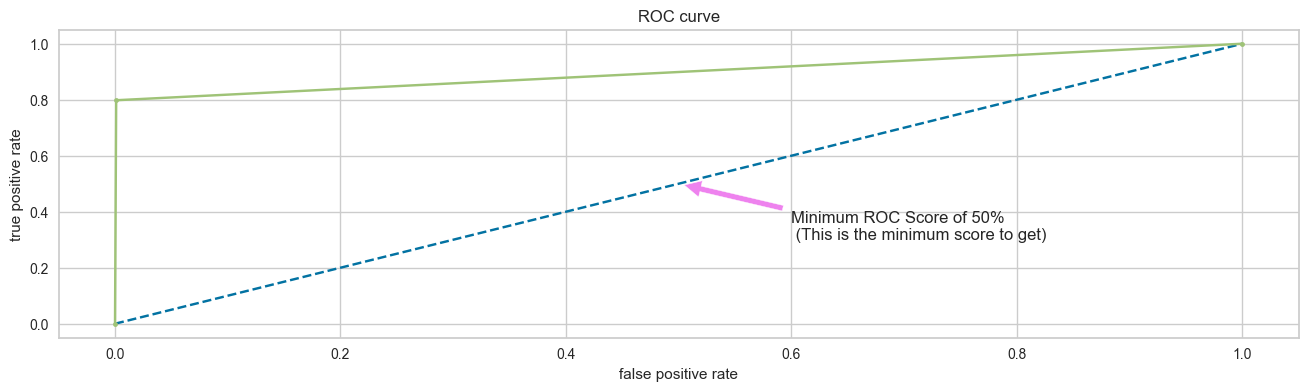

AUC Score: 0.8985636867782468


In [20]:
print('ROC Plot for Imbalanced Data')
probs,y_test=DT(X_train, y_train, X_test, y_test)
plot_roc(y_test,probs)
roc_auc = roc_auc_score(y_test, probs)
print('AUC Score:',roc_auc)

ROC Plot for Oversampled Data


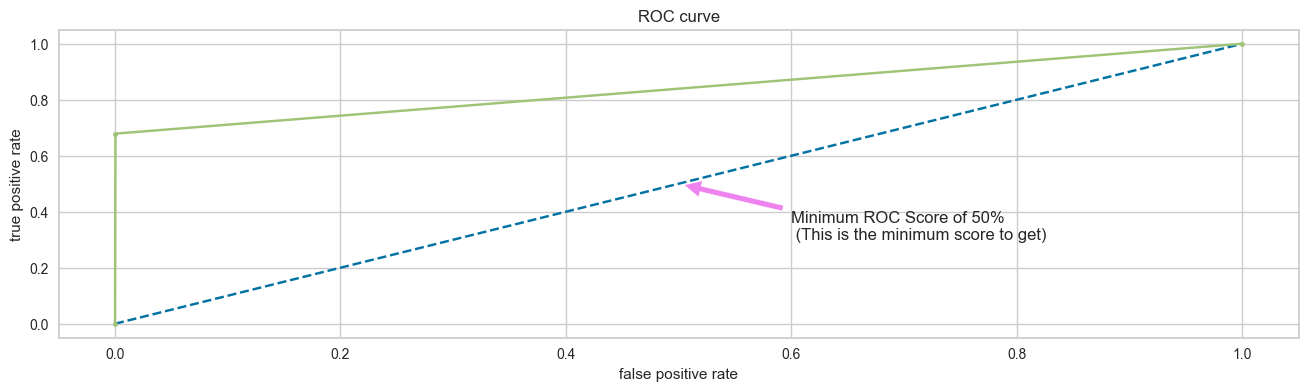

AUC Score: 0.8392560598498268
0    227462
1    227462
Name: Class, dtype: int64


Text(0.5, 0, 'Class')

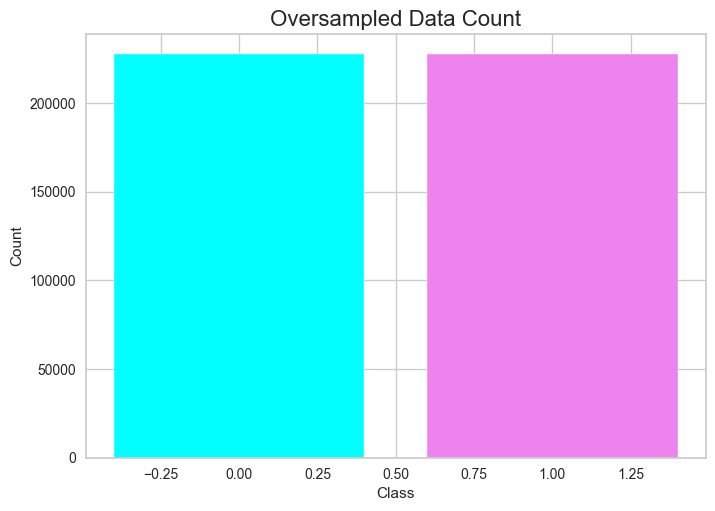

In [21]:
print('ROC Plot for Oversampled Data')
probs,y_test=DT(X_train_ros, y_train_ros, X_test, y_test)
plot_roc(y_test,probs)
roc_auc = roc_auc_score(y_test, probs)
print('AUC Score:',roc_auc)
print(y_train_ros.value_counts())
colors = ["aqua", "violet"]
plt.bar(y_train_ros.value_counts().index, y_train_ros.value_counts(), color = colors)
plt.title('Oversampled Data Count', fontsize = 16)
plt.ylabel('Count')
plt.xlabel('Class')

ROC Plot for Undersampled Data


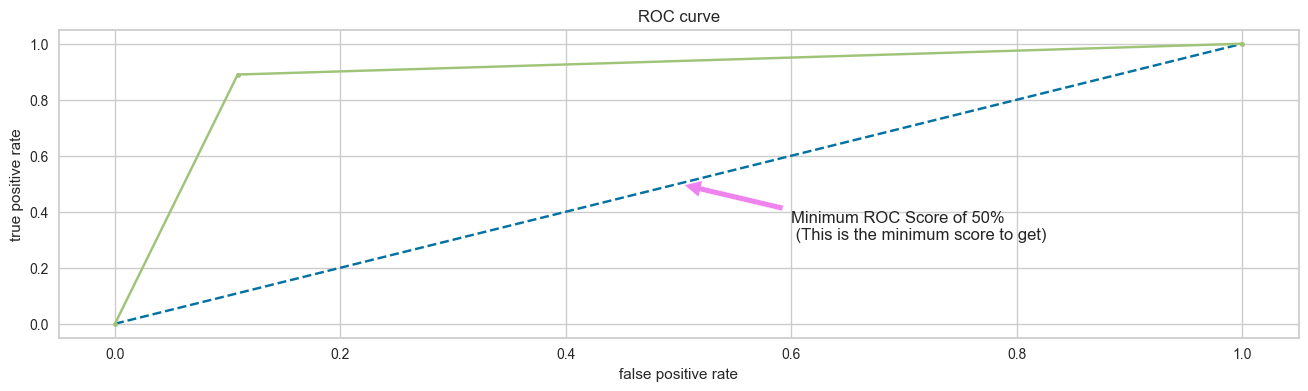

AUC Score: 0.8905418722709476
0    383
1    383
Name: Class, dtype: int64


Text(0.5, 0, 'Class')

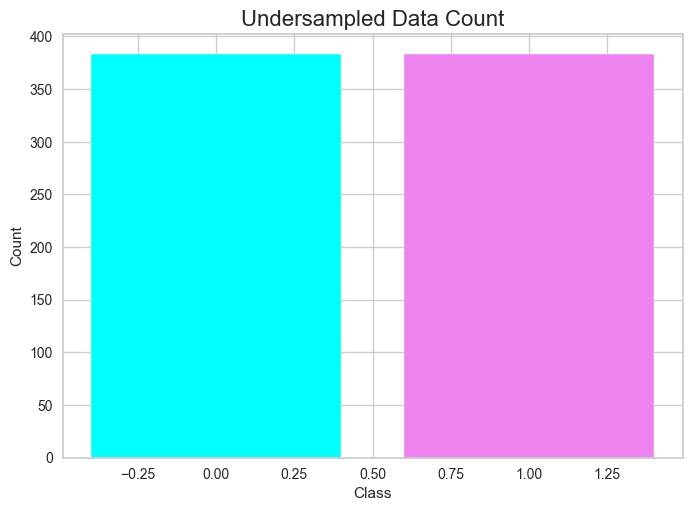

In [22]:
print('ROC Plot for Undersampled Data')
probs,y_test=DT(X_train_rus, y_train_rus, X_test, y_test)
plot_roc(y_test,probs)
roc_auc = roc_auc_score(y_test, probs)
print('AUC Score:',roc_auc)
print(y_train_rus.value_counts())
colors = ["aqua", "violet"]
plt.bar(y_train_rus.value_counts().index, y_train_rus.value_counts(), color = colors)
plt.title('Undersampled Data Count', fontsize = 16)
plt.ylabel('Count')
plt.xlabel('Class')

#### *3. 2. Analyzing PR Curve and Confusion Matrix for Decision Tree using Normal, Oversampled and Undersampled Datasets*

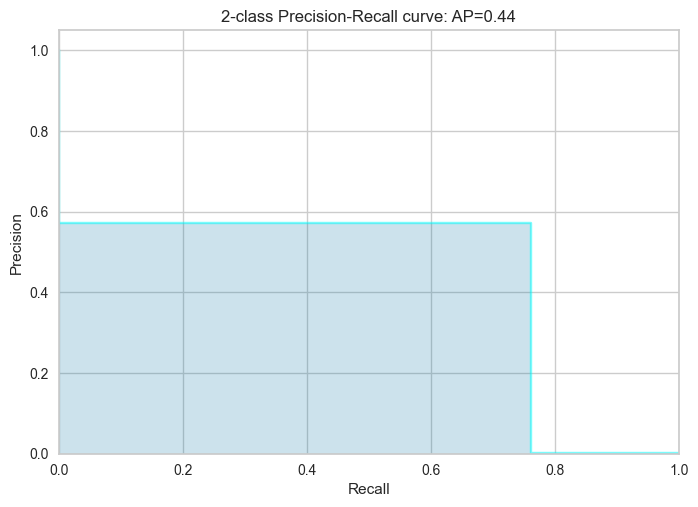

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.57      0.76      0.65       109

    accuracy                           1.00     56962
   macro avg       0.79      0.88      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56791    62]
 [   26    83]]


In [23]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

average_precision = average_precision_score(y_test, y_predicted)
precision, recall, _ = precision_recall_curve(y_test, y_predicted)
plot_pr_curve(recall, precision, average_precision)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

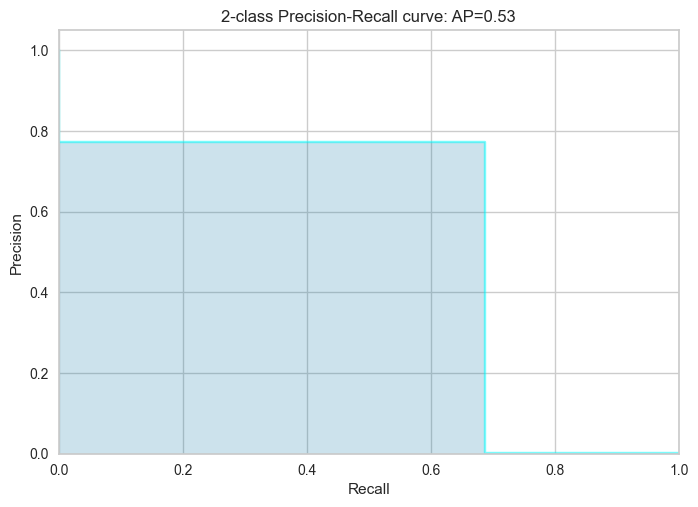

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.77      0.69      0.73       109

    accuracy                           1.00     56962
   macro avg       0.89      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56831    22]
 [   34    75]]


In [24]:
model = DecisionTreeClassifier()
model.fit(X_train_ros, y_train_ros)
y_predicted = model.predict(X_test)

average_precision = average_precision_score(y_test, y_predicted)
precision, recall, _ = precision_recall_curve(y_test, y_predicted)
plot_pr_curve(recall, precision, average_precision)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

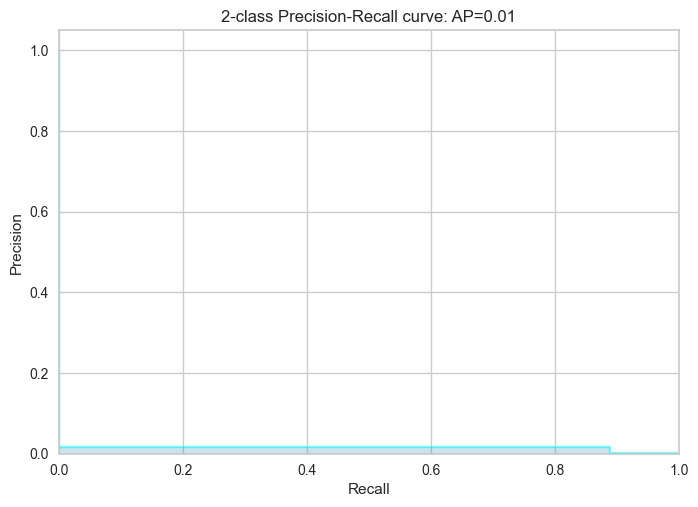

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     56853
           1       0.02      0.89      0.03       109

    accuracy                           0.89     56962
   macro avg       0.51      0.89      0.49     56962
weighted avg       1.00      0.89      0.94     56962

Confusion matrix:
 [[50750  6103]
 [   12    97]]


In [25]:
model = DecisionTreeClassifier()
model.fit(X_train_rus, y_train_rus)
y_predicted = model.predict(X_test)

average_precision = average_precision_score(y_test, y_predicted)
precision, recall, _ = precision_recall_curve(y_test, y_predicted)
plot_pr_curve(recall, precision, average_precision)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

***
# *4. Random Forest Classifier*

#### *4. 1. Analyzing Model Performance for Random Forest using Normal, Oversampled and Undersampled Datasets*

In [26]:
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.95      0.77      0.85       109

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56849     4]
 [   25    84]]


In [27]:
model = RandomForestClassifier(random_state=5)
model.fit(X_train_ros, y_train_ros)
y_predicted = model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.94      0.74      0.83       109

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56848     5]
 [   28    81]]


In [28]:
model = RandomForestClassifier(random_state=5)
model.fit(X_train_rus, y_train_rus)
y_predicted = model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     56853
           1       0.04      0.93      0.07       109

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.97     56962

Confusion matrix:
 [[54103  2750]
 [    8   101]]


***
# *5. Artificial Neural Network (MLP Classifier)*

#### *5. 1. Data Preparation and Preprocessing*

In [29]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### *5. 2. Initializing and Building the ANN*

In [46]:
model = Sequential()
model.add(Dense(units = 64, activation = 'relu', input_dim = X_train_scaled.shape[1]))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1984      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8257 (32.25 KB)
Trainable params: 8257 (32.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### *5. 3. Compiling the ANN*

In [48]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### *5. 4. Fitting the ANN to the Training Set*

In [49]:
model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 100, validation_data = (X_test_scaled, y_test))

Epoch 1/10
2279/2279 [==============================] - 6s 2ms/step - loss: 0.0101 - accuracy: 0.9980 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 2/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 3/10
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 4/10
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 5/10
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 6/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 7/10
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy:

#### *5. 5. Making the Prediction and Evaluating the Model*

In [50]:
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

1781/1781 [==============================] - 2s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.85      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56849    15]
 [   15    83]]


***
# *6. K-means Clustering*

#### *6. 1. Finding the Optimal Number of Clusters using the Elbow Method*

C:\Users\Test\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Test\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Test\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Test\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

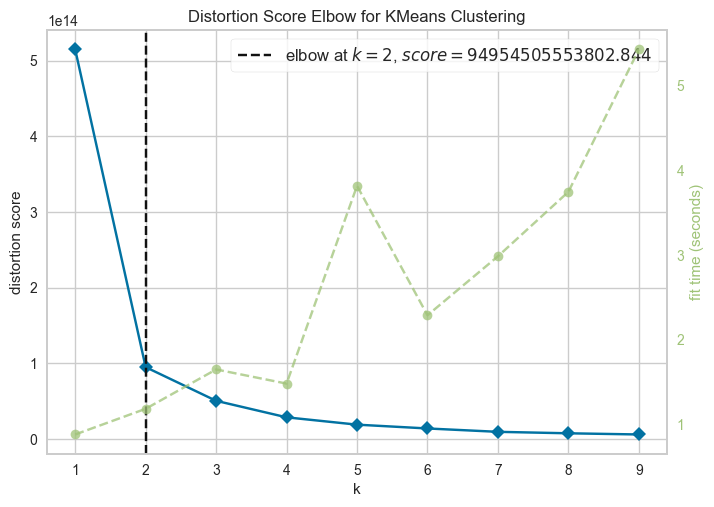

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
model = KMeans(random_state = 42)
distortion_visualizer = KElbowVisualizer(model, k = (1, 10))
distortion_visualizer.fit(X_train)
distortion_visualizer.show()

#### *6. 2. Preparing the Data for Supervised Evaluation*

In [52]:
train,test = train_test_split(df, test_size = 0.2, random_state = 0)

features_train = train.drop(['Class'],axis = 1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

features_test = test.drop(['Class'],axis = 1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

#### *6. 3. Building the Model*

In [53]:
model = KMeans(n_clusters = 2, random_state = 4)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

C:\Users\Test\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### *6. 4. Performance Measure*

In [54]:
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))
print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))

Confusion Matrix:
 [[26208 30653]
 [   35    66]]
kmeans_precison_score: 0.002148507438393177
kmeans_recall_score: 0.6534653465346535
kmeans_accuracy_score: 0.46125487166883183
kmeans_f1_score: 0.004282933160285529


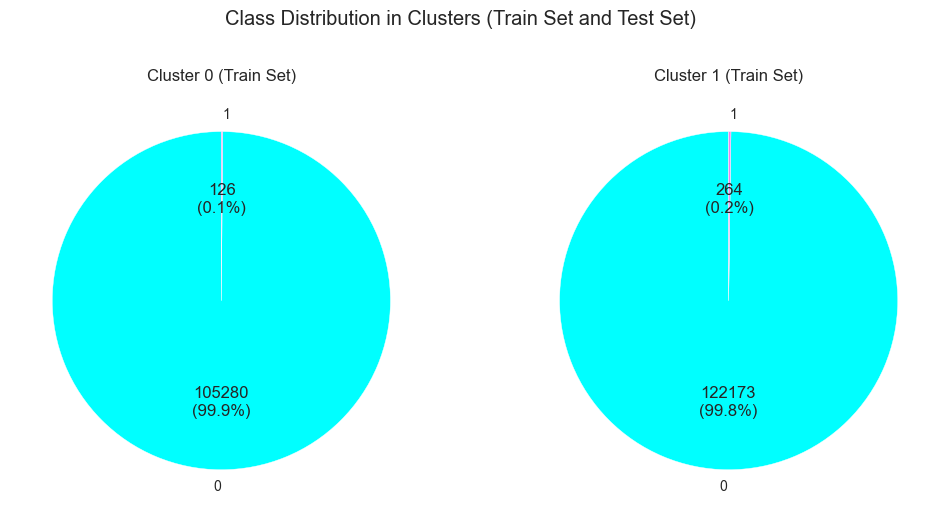

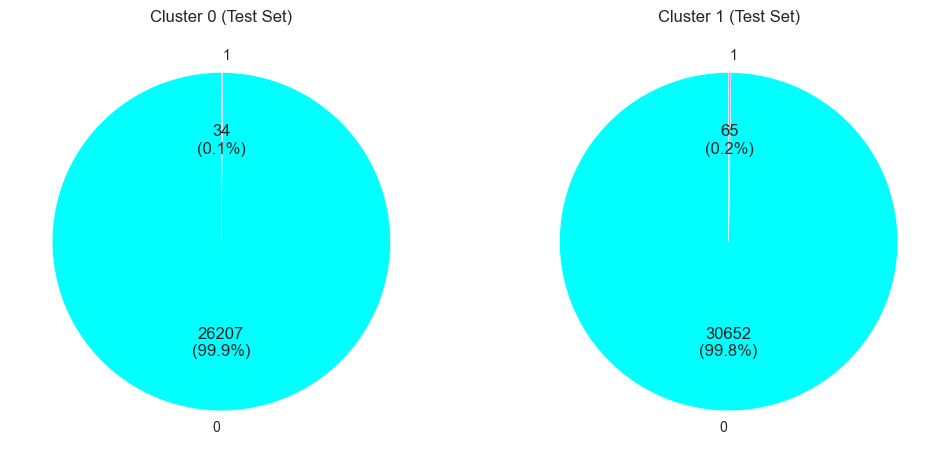

In [57]:
train_result = pd.DataFrame({'Class': labels_train.flatten(), 'Cluster': labels_train_predicted})
test_result = pd.DataFrame({'Class': labels_test.flatten(), 'Cluster': labels_test_predicted})

train_counts = train_result.groupby(['Cluster', 'Class']).size().unstack(fill_value = 0)
test_counts = test_result.groupby(['Cluster', 'Class']).size().unstack(fill_value = 0)

fig, axes = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle('Class Distribution in Clusters (Train Set and Test Set)')

def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:d}\n({:.1f}%)".format(absolute, pct)

axes[0].pie(train_counts.iloc[0], labels = train_counts.columns, autopct = lambda pct: func(pct, train_counts.iloc[0]), startangle = 90, colors = colors)
axes[0].set_title('Cluster 0 (Train Set)')

axes[1].pie(train_counts.iloc[1], labels = train_counts.columns, autopct = lambda pct: func(pct, train_counts.iloc[1]), startangle = 90, colors = colors)
axes[1].set_title('Cluster 1 (Train Set)')

plt.show()

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

axes[0].pie(test_counts.iloc[0], labels = test_counts.columns, autopct = lambda pct: func(pct, test_counts.iloc[0]), startangle = 90, colors = colors)
axes[0].set_title('Cluster 0 (Test Set)')

axes[1].pie(test_counts.iloc[1], labels = test_counts.columns, autopct = lambda pct: func(pct, test_counts.iloc[1]), startangle = 90, colors = colors)
axes[1].set_title('Cluster 1 (Test Set)')

plt.show()

#### *6. 5. Building and Evaluating K-means using Unsupervised Evaluation*

In [58]:
model = KMeans(n_clusters = 2, random_state = 0)
labels = model.fit_predict(X_train)

C:\Users\Test\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
print(f'Davies-Bouldin index = {davies_bouldin_score(X_train, labels)}')
print(f'Silhouette Score = {silhouette_score(features_test, labels_test)}')

Davies-Bouldin index = 0.3898523058247392


C:\Users\Test\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score = 0.03274791086307875
